# Techniques of AI Project
## Breast Cancer Detection (Option 3)
## Sajjad Mahmoudi (0573106)
## E-mail = sajjad.mahmoudi@vub.be

In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from collections import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import FastICA

# TASK 1

## Exploratory Data Analysis & Preprocessing

In [2]:
# read the excel file to the dataframe called "df_raw_features"
df_raw_features = pd.read_excel('features.xlsx')
df_raw_features.head()

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0


In [3]:
# check if there is non-numeric value in the dataframe
types = df_raw_features.dtypes
for i in range(len(types)):
    if types[i] != 'float64' and types[i] != 'int64':
        print(i)
print('all values are numeric')

all values are numeric


In [37]:
# check if there is null values in the dataframe "df_raw_features"
df_raw_features.isnull().sum().sum()

0

In [5]:
# check if there is missing values in the dataframe "df_raw_features"
df_raw_features.isna().sum().sum()

0

#### So, in the dataset, there is no null or missing  or non-numeric value
---

No. of negative samples: 2020
No. of positive samples: 1542


<AxesSubplot:xlabel='Label', ylabel='count'>

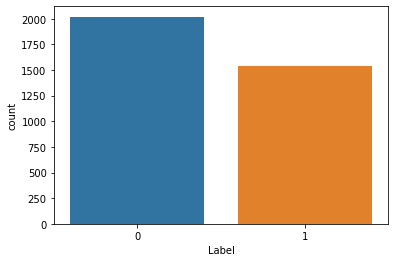

In [6]:
# check the distribution of labels; is it a balanced dataset?
l0 = len(df_raw_features.loc[df_raw_features['Label'] == 0])
l1 = len(df_raw_features.loc[df_raw_features['Label'] == 1])
print(f'No. of negative samples: {l0}\nNo. of positive samples: {l1}')
sns.countplot(df_raw_features['Label'], label= 'count')

#### As the plot above illustrates, although positive and negative samples are not equal, we can ignore this insignificant difference. However, we will use random under/over sampler to test balance data sets as well, when running models.
---

In [7]:
# describe() method
pd.set_option('display.max_columns', None) # display all columns
df_raw_features.describe()

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,wavelet-LHH_glrlm_LongRunEmphasis,wavelet-LHH_glrlm_RunPercentage,wavelet2-LLH_glrlm_RunVariance,wavelet-LHH_glrlm_RunLengthNonUniformityNormalized,wavelet-HHH_glrlm_LongRunEmphasis,wavelet-LHH_glrlm_RunVariance,wavelet2-LLH_glrlm_LongRunEmphasis,wavelet2-LHL_glrlm_LongRunEmphasis,wavelet-HHH_glrlm_RunVariance,wavelet2-LHH_glrlm_LongRunEmphasis,wavelet2-LHH_glrlm_RunPercentage,wavelet-LHL_glrlm_RunPercentage,wavelet-HHH_glrlm_RunLengthNonUniformityNormalized,wavelet2-HHH_glrlm_RunLengthNonUniformityNormalized,wavelet2-HHH_glrlm_RunPercentage,wavelet-LHH_glrlm_LongRunLowGrayLevelEmphasis,wavelet2-LLH_glrlm_RunPercentage,wavelet-LHH_glrlm_ShortRunEmphasis,wavelet2-LHH_glrlm_RunLengthNonUniformityNormalized,log-sigma-3-0-mm-3D_glrlm_RunPercentage,wavelet2-LHH_glrlm_ShortRunEmphasis,original_glrlm_LowGrayLevelRunEmphasis,wavelet-LLH_glrlm_LongRunLowGrayLevelEmphasis,wavelet2-HHH_glrlm_ShortRunEmphasis,wavelet-HHH_glrlm_RunPercentage,original_glrlm_RunPercentage,original_glrlm_RunLengthNonUniformityNormalized,wavelet2-LLH_glrlm_RunLengthNonUniformityNormalized,log-sigma-3-0-mm-3D_glrlm_ShortRunEmphasis,wavelet-HHL_glrlm_LongRunEmphasis,original_glrlm_ShortRunEmphasis,wavelet-HHL_glrlm_RunLengthNonUniformityNormalized,wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis,wavelet-LHL_glrlm_RunLengthNonUniformityNormalized,wavelet2-HHL_glrlm_RunLengthNonUniformityNormalized,log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet2-LHL_glrlm_RunPercentage,wavelet2-HHL_glrlm_RunPercentage,wavelet-HLH_glrlm_RunLengthNonUniformityNormalized,original_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LHL_glrlm_RunEntropy,wavelet2-LLH_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-HLH_glrlm_LongRunEmphasis,wavelet-HHL_glrlm_RunPercentage,wavelet-HLH_glrlm_RunPercentage,wavelet-LHH_glrlm_RunEntropy,wavelet-HHH_glrlm_ShortRunEmphasis,wavelet2-LHL_glrlm_RunLengthNonUniformityNormalized,wavelet-HHH_firstorder_InterquartileRange,wavelet2-LLH_glrlm_LongRunLowGrayLevelEmphasis,wavelet-LHH_firstorder_RobustMeanAbsoluteDeviation,wavelet-HHH_firstorder_RobustMeanAbsoluteDeviation,wavelet2-HLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet2-LLH_glrlm_ShortRunEmphasis,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis,wavelet-LHH_firstorder_InterquartileRange,wavelet-HHL_glrlm_ShortRunEmphasis,wavelet-LHH_firstorder_MeanAbsoluteDeviation,wavelet-LHL_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-LHL_glrlm_ShortRunEmphasis,wavelet-HHH_glrlm_RunEntropy,wavelet-HLH_glrlm_ShortRunEmphasis,wavelet-LLH_firstorder_Kurtosis,wavelet2-LHH_glrlm_RunEntropy,wavelet2-LHL_glrlm_ShortRunEmphasis,log-sigma-3-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis,log-sigma-3-0-mm-3D_glszm_ZonePercentage,wavelet-HHL_glrlm_RunEntropy,wavelet-LHH_firstorder_RootMeanSquared,wavelet2-LLH_glszm_ZonePercentage,wavelet-LLH_glrlm_ShortRunEmphasis,wavelet-HHL_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-HHH_firstorder_MeanAbsoluteDeviation,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLH_gldm_DependenceNonUniformityNormalized,wavelet2-LLH_gldm_SmallDependenceEmphasis,original_glszm_ZonePercentage,wavelet2-HHL_glrlm_ShortRunLowGrayLevelEmphasis,wavelet2-LHL_gldm_DependenceNonUniformityNormalized,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet2-LHL_gldm_SmallDependenceEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,log-sigma-3-0-mm-3D_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceEmphasis,wavelet-HHH_firstorder_RootMeanSquared,log-sigma-3-0-mm-3D_firstorder_Range,original_glszm_LowGrayLevelZoneEmphasis,wavelet-LLH_gldm_DependenceEntropy,wavelet-LHH_firstorder_90Percentile,wavelet2-LHL_glrlm_LongRunLowGrayLevelEmphasis,wave

#### As the describe table illustrates, there is no interesting or unsual observation in each feature. Apparently, each feature could be informative for potential models.
---

In [8]:
# convert the dataframe "df_raw_features" to array
arr_raw_features = df_raw_features.to_numpy()

In [13]:
# remove the "patient ID" and "Label" columns from X_task1 and the column "patient ID" from y_task1
#del X_task1, y_task1
X_task1 = arr_raw_features[:, 1: -1]
y_task1 = arr_raw_features[:, -1]
print(X_task1.shape, y_task1.shape)

(3562, 150) (3562,)


### Normalisation
#### First, the confusion matrices and metrics obtained from catBoostClassifier are compared to find out how different methods of normalisation (MinMaxScaler and StandardScaler) affects the classifier results
#### The confusion matrices and metrics which are for MinMaxScaler and StandardScaler are quite similar, so the normalisation method has not a great effect in the final results while PCA keeps 30 features when using the data normalised by MinMaxScaler and keeps 43 features when using the data normalised by StandardScaler
#### As a result, normalisation method could affect dimensionality reduction method and here, we use MinMaxScaler to normalise the data because of less features

In [14]:
# normalise data using "MinMaxScaler"
minmax_scaler = MinMaxScaler()
X_task1 = minmax_scaler.fit_transform(X_task1)

In [15]:
# dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=0)
pca.fit(X_task1)
X_task1 = pca.transform(X_task1)
print('the number of remaining features: ', X_task1.shape[1])

the number of remaining features:  30


In [16]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_task1, y_task1, random_state=0)

In [17]:
# "CatBoostClassifier"
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, task_type='GPU', eval_metric='Accuracy')
model.fit(x_train, y_train, [], eval_set=(x_test, y_test))

0:	learn: 0.7158368	test: 0.6734007	best: 0.6734007 (0)	total: 17ms	remaining: 1.68s
1:	learn: 0.7270685	test: 0.6992144	best: 0.6992144 (1)	total: 26.1ms	remaining: 1.28s
2:	learn: 0.7416698	test: 0.7115600	best: 0.7115600 (2)	total: 34ms	remaining: 1.1s
3:	learn: 0.7431674	test: 0.7037037	best: 0.7115600 (2)	total: 42.1ms	remaining: 1.01s
4:	learn: 0.7540247	test: 0.6992144	best: 0.7115600 (2)	total: 50ms	remaining: 950ms
5:	learn: 0.7577686	test: 0.7070707	best: 0.7115600 (2)	total: 57.9ms	remaining: 906ms
6:	learn: 0.7641333	test: 0.7171717	best: 0.7171717 (6)	total: 65.8ms	remaining: 874ms
7:	learn: 0.7656308	test: 0.7182941	best: 0.7182941 (7)	total: 73.7ms	remaining: 848ms
8:	learn: 0.7719955	test: 0.7227834	best: 0.7227834 (8)	total: 81.6ms	remaining: 825ms
9:	learn: 0.7738675	test: 0.7194164	best: 0.7227834 (8)	total: 89.6ms	remaining: 806ms
10:	learn: 0.7772370	test: 0.7194164	best: 0.7227834 (8)	total: 97.4ms	remaining: 788ms
11:	learn: 0.7794833	test: 0.7194164	best: 0.7227

In [18]:
y_pred = model.predict(x_test)

In [19]:
# confusion matrix for the data normalised by MinMaxScaler
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[430,  68],
       [142, 251]], dtype=int64)

In [20]:
# metrics for the data normalised by MinMaxScaler
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       498
         1.0       0.79      0.64      0.71       393

    accuracy                           0.76       891
   macro avg       0.77      0.75      0.75       891
weighted avg       0.77      0.76      0.76       891



In [ ]:
# normalise data using "StandardScaler"
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_task1 = std_scaler.fit_transform(X_task1)

#### metrics for the data normalised by "StandardScaler"
array([[428,  78],
       [139, 246]], dtype=int64)


              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       506
         1.0       0.76      0.64      0.69       385

    accuracy                           0.76       891
   macro avg       0.76      0.74      0.75       891<br>
weighted avg       0.76      0.76      0.75       891

### Dimensionality Reduction 
#### To find the best, some dimensionality reduction techniques are tested with the common model "SVM"

In [51]:
del X_task1, y_task1
X_task1 = arr_raw_features[:, 1: -1]
y_task1 = arr_raw_features[:, -1]

In [52]:
# normalise data using "MinMaxScaler"
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_task1 = minmax_scaler.fit_transform(X_task1)

In [23]:
# dimension reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=0)
pca.fit(X_task1)
X_task1 = pca.transform(X_task1)
X_task1.shape[1]

30

In [24]:
# split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(X_task1, y_task1, random_state=0)

In [25]:
# linear SVM model
from sklearn.svm import SVC
svm_classifier = SVC(random_state=0)
svm_classifier.fit(x_train, y_train)

SVC(random_state=0)

In [26]:
# predict labels from x_test
y_pred = svm_classifier.predict(x_test)

In [27]:
# confusion matrix for the features reduced by PCA
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[436,  62],
       [154, 239]], dtype=int64)

In [28]:
# metrics for the features reduced by PCA
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80       498
         1.0       0.79      0.61      0.69       393

    accuracy                           0.76       891
   macro avg       0.77      0.74      0.75       891
weighted avg       0.76      0.76      0.75       891



### FastICA

In [ ]:
from sklearn.decomposition import FastICA
fastICA = FastICA(random_state=0, n_components=30)
X_task1 = fastICA.fit_transform(X_task1)

#### confusion matrix and metrics for the features reduced by "FastICA"
array([[433,  65],
       [147, 246]], dtype=int64)
       
              precision    recall  f1-score   support

         0.0       0.75      0.87      0.80       498
         1.0       0.79      0.63      0.70       393

    accuracy                           0.76       891
   macro avg       0.77      0.75      0.75       891<br>
weighted avg       0.77      0.76      0.76       891

### ISOMAP

In [ ]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=30)
X_task1 = isomap.fit_transform(X_task1)

#### confusion matrix and metrics for the features reduced by "ISOMAP"
array([[485,  52],
       [155, 199]], dtype=int64)
       
             precision    recall  f1-score   support

         0.0       0.76      0.90      0.82       537
         1.0       0.79      0.56      0.66       354

    accuracy                           0.77       891
   macro avg       0.78      0.73      0.74       891<br>
weighted avg       0.77      0.77      0.76       891

### UMAP

In [ ]:
import umap
umap = umap.UMAP(n_components=30, random_state=0)
X_task1 = umap.fit_transform(X_task1)

#### confusion matrix and metrics for the features reduced by "UMAP"
array([[432,  66],
       [256, 137]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.63      0.87      0.73       498
         1.0       0.67      0.35      0.46       393

    accuracy                           0.64       891
   macro avg       0.65      0.61      0.59       891<br>
weighted avg       0.65      0.64      0.61       891

### Factor Analysis

In [53]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=30, random_state=0)
X_task1 = fa.fit_transform(X_task1)

#### confusion matrix and metrics for the features reduced by "Factor Analysis"
array([[455,  47],
       [154, 235]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       502
         1.0       0.83      0.60      0.70       389

    accuracy                           0.77       891
   macro avg       0.79      0.76      0.76       891<br>
weighted avg       0.78      0.77      0.77       891


### TSNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)
X_task1 = tsne.fit_transform(X_task1)

#### confusion matrix and metrics for the features reduced by "TSNE"
array([[406,  92],
       [198, 195]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74       498
         1.0       0.68      0.50      0.57       393

    accuracy                           0.67       891
   macro avg       0.68      0.66      0.66       891<br>
weighted avg       0.68      0.67      0.66       891

6 different methods of dimensionality reduction are used, namely, "PCA", "FASTICA", "ISOMAP", "UMAP", "FACTORANALYSIS", and "TSNE" with a common model "SVM". The confusion matrices and classification metrics of each method are shown above. Note that the "n_component" of the PCA technique is set to 0.95 percent and because it reduced the dimension to 30 features, for the other techniques the "n_component" argument is set to 30.
With a quick glance, we can ignore the TSNE and UMAP methods as they have the accuracy less than the baseline classifier's accuracy which is about 0.60 according to the following baseline model.

||Accuracy |Precision|Recall|Tp/Fn|
|:-----|:----:|----:|----:|----:|
|PCA |0.76 |0.79 |0.61 |1.552|
|FastICA |0.76 |0.79 |0.63 |1.673|
|ISOMAP |0.77 |0.79 |0.56 |1.283|
|Factor Analysis |0.77 |0.83 |0.60 |1.523|

According to the table above, the four remained techniques have quite similar in terms of accuracy, precision, and/or recall.
Here, as we did all this to diagnose the cancer in the very first stages of its progress, the most important things in the model  will be the true positives and false negatives in such a way that the former gets as high as possible and the latter as low as possible. So, the ratio of $T_p/F_n$ is measured for each technique in the table and we pick the technique which has the highest ratio of $T_p/F_n$ as our dimensionality reduction technique, that is **FastICA**.

### Feature Selection
#### In addition to dimensionality reduction, in order to compare with dimensionality reduction methods, some featrure selection techniques are also implemented such as chi-squared test, backward selection, and extra trees classifier 

In [58]:
# chi-squared test 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_task1 = SelectKBest(k=30).fit_transform(X_task1, y_task1)

In [ ]:
# backward selection
from sklearn.feature_selection import SequentialFeatureSelector
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10, task_type='GPU')
sfs = SequentialFeatureSelector(cat, n_features_to_select=30, direction='backward')
X_task1 = sfs.fit_transform(X_task1, y_task1)

In [ ]:
# this part is generally inspired from: https://github.com/nishantrajpoot/breastCancerML/blob/815e75da355438b1ffb3d54d711b1d520e1da0d2/CancerProject%20-Final.ipynb
# extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
target_col = "Label"
PatientID = "Patient ID"
X1 = df_raw_features.loc[:, df_raw_features.columns != target_col]
X2 = X1.loc[:, X1.columns != PatientID]
y = df_raw_features.loc[:, target_col]
model = ExtraTreesClassifier(random_state=0)
model.fit(X2,y)
feat_importances = pd.Series(model.feature_importances_, index=X2.columns)
feat_importances.nlargest(30).plot(kind='barh', figsize=(10,20))
plt.show()

# create a new dataframe called "df_extra" with the 30 most important features obtained from "ExtraTreesClassifier" 
a = model.feature_importances_
b = np.argpartition(a, range(len(a)))[-1:-31:-1]
c = df_raw_features.columns[b]
df_extra = df_raw_features[c]
df_extra.insert(0,'Patient ID',df_raw_features['Patient ID'])
df_extra.insert(31,'Label',df_raw_features['Label'])
df_extra_arr = df_extra.to_numpy()
X_task1 = df_extra_arr[:, 1:-1]
y_task1 = df_extra_arr[:, -1]

## Machine Learning
#### Various models with balanced and/or imbalaned data sets are tested,

In [81]:
del X_task1, y_task1
X_task1 = arr_raw_features[:, 1: -1]
y_task1 = arr_raw_features[:, -1]

In [57]:
# normalise data using "MinMaxScaler"
minmax_scaler = MinMaxScaler() 
X_task1 = minmax_scaler.fit_transform(X_task1)

### Imbalane Dataset

In [ ]:
# Fast ICA
fastICA = FastICA(random_state=0, n_components=30)
X_task1 = fastICA.fit_transform(X_task1)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X_task1, y_task1, random_state=0)

### Balance Dataset (Random Over Sampler)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_task1, y_task1)

In [ ]:
# Fast ICA
fastICA = FastICA(random_state=0, n_components=30)
X_ros = fastICA.fit_transform(X_ros)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=0)

### Balance Dataset (Random Under Sampler)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_task1, y_task1)

In [ ]:
# Fast ICA
fastICA = FastICA(random_state=0, n_components=30)
X_rus = fastICA.fit_transform(X_rus)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state=0)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(random_state=0, criterion='gini') #criterion='entropy'
DT_classifier.fit(x_train, y_train)

In [ ]:
y_pred = DT_classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

### K-Nearst Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=200)
KNN_classifier.fit(x_train, y_train)

In [ ]:
y_pred = KNN_classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

### Ensemble Random Forest  (ERF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ERF_classifier = RandomForestClassifier(max_depth=2, random_state=0) #criterion='entropy'
ERF_classifier.fit(x_train, y_train)

In [ ]:
y_pred = ERF_classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

### Support Vector Classification (SVC)

In [47]:
from sklearn.svm import SVC
SVC_classifier = SVC(random_state=0)
SVC_classifier.fit(x_train, y_train)

SVC(random_state=0)

In [48]:
y_pred = SVC_classifier.predict(x_test)

In [89]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

In [90]:
print(classification_report(y_true=y_test, y_pred=y_pred))

### AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_classifier.fit(x_train, y_train)

In [ ]:
y_pred = ada_classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

### All results of various scenarios

In [29]:
# read the .csv file containing all results
all_results = pd.read_csv('all_models.csv')
all_results

,models,minmax.ros.ica,minmax.ica,minmax.fa,minmax.umap,minmax.backward,minmax.rus.ica,minmax,minmax.isomap,minmax.tsne,minmax.ros,minmax.rus,minmax.chi,minmax.forward,minmax.etc
0,Decision Tree,67,63,66,57,69,64,68,60,61,71,69,66,67,69
1,KNN,70,66,68,64,66,69,66,65,64,66,63,66,68,62
2,ERF,66,64,68,64,71,69,72,62,62,69,70,70,71,72
3,SVC,76,73,74,66,77,72,75,68,64,77,75,76,75,62
4,AdaBoost,71,70,71,67,73,70,73,65,63,73,73,71,74,72


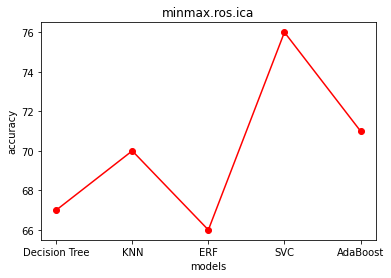

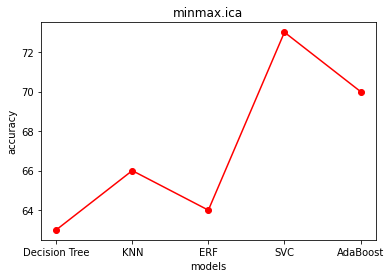

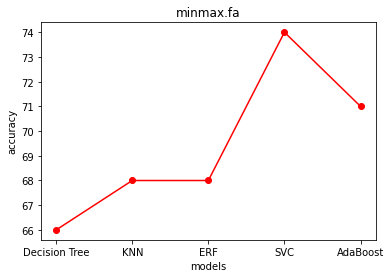

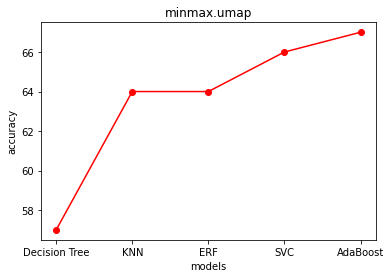

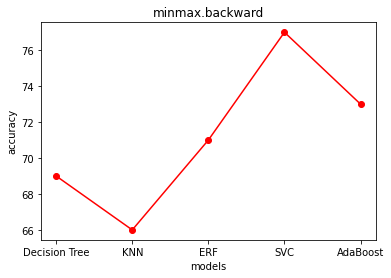

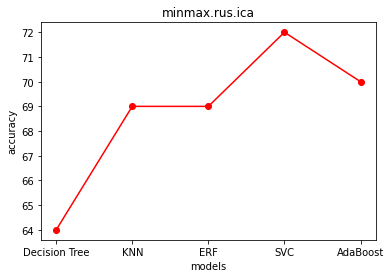

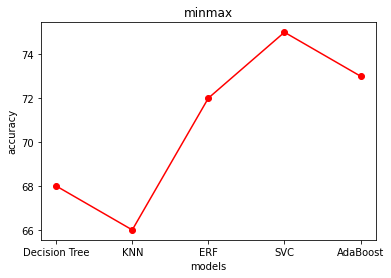

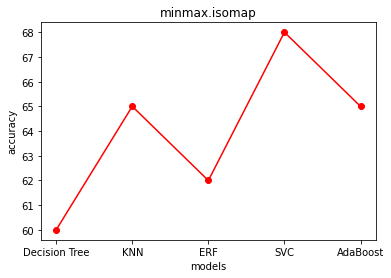

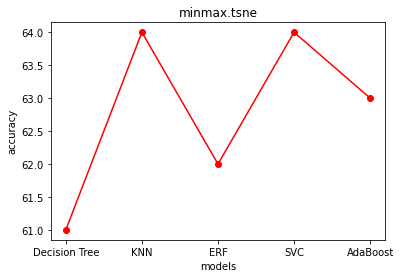

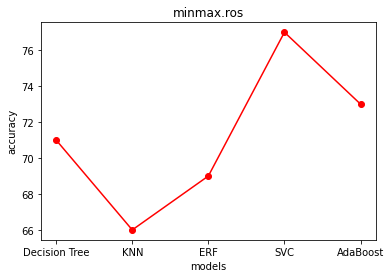

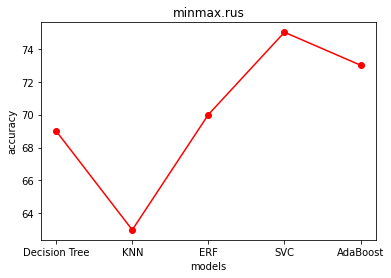

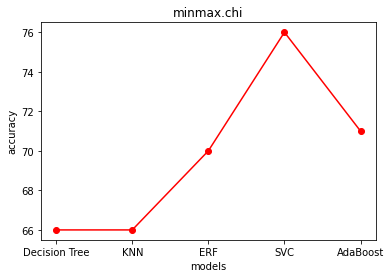

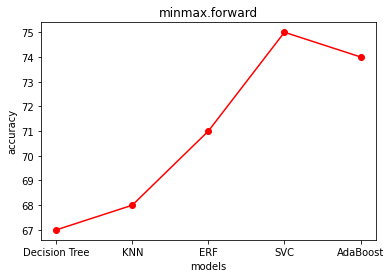

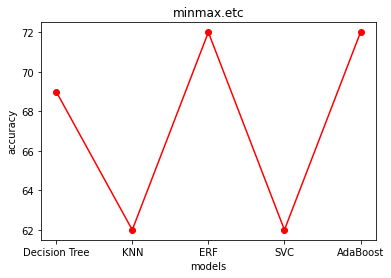

In [34]:
# plot Accuracy vs. Model for each scenario
plt.figure(1)
plt.plot(all_results['models'], all_results['minmax.ros.ica'],marker="o",color="red")
plt.title("minmax.ros.ica")
plt.ylabel('accuracy')
plt.xlabel('models') 
plt.figure(2)
plt.plot(all_results['models'], all_results['minmax.ica'],marker="o",color="red")
plt.title("minmax.ica")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(3)
plt.plot(all_results['models'], all_results['minmax.fa'],marker="o",color="red")
plt.title("minmax.fa")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(4)
plt.plot(all_results['models'], all_results['minmax.umap'],marker="o",color="red")
plt.title("minmax.umap")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(5)
plt.plot(all_results['models'], all_results['minmax.backward'],marker="o",color="red")
plt.title("minmax.backward")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(6)
plt.plot(all_results['models'], all_results['minmax.rus.ica'],marker="o",color="red")
plt.title("minmax.rus.ica")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(7)
plt.plot(all_results['models'], all_results['minmax'],marker="o",color="red")
plt.title("minmax")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(8)
plt.plot(all_results['models'], all_results['minmax.isomap'],marker="o",color="red")
plt.title("minmax.isomap")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(9)
plt.plot(all_results['models'], all_results['minmax.tsne'],marker="o",color="red")
plt.title("minmax.tsne")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(10)
plt.plot(all_results['models'], all_results['minmax.ros'],marker="o",color="red")
plt.title("minmax.ros")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(11)
plt.plot(all_results['models'], all_results['minmax.rus'],marker="o",color="red")
plt.title("minmax.rus")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(12)
plt.plot(all_results['models'], all_results['minmax.chi'],marker="o",color="red")
plt.title("minmax.chi")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(13)
plt.plot(all_results['models'], all_results['minmax.forward'],marker="o",color="red")
plt.title("minmax.forward")
plt.ylabel('accuracy')
plt.xlabel('models')
plt.figure(14)
plt.plot(all_results['models'], all_results['minmax.etc'],marker="o",color="red")
plt.title("minmax.etc")
plt.ylabel('accuracy')
plt.xlabel('models')

plt.show()

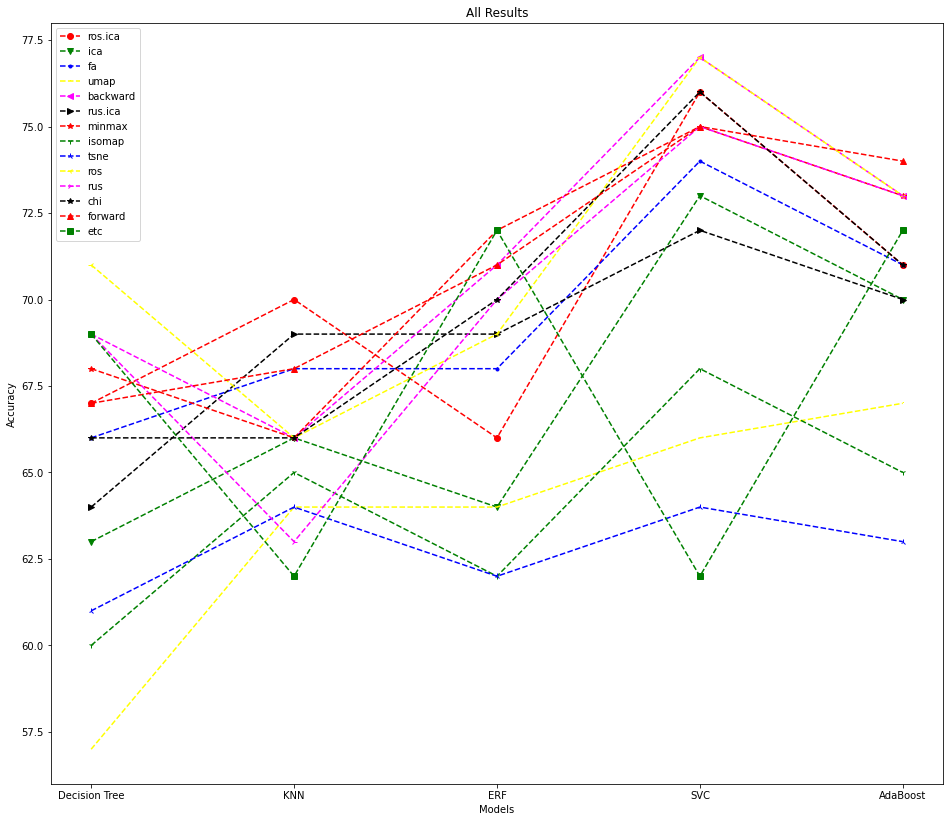

In [35]:
# plot Accuracy vs. Models for all scenarios in one plot
plt.figure(1,(16,14))
plt.plot(all_results['models'], all_results['minmax.ros.ica'],marker="o",linestyle='--',color="red",label='ros.ica')
plt.plot(all_results['models'], all_results['minmax.ica'],marker="v",linestyle='--',color="green",label='ica')
plt.plot(all_results['models'], all_results['minmax.fa'],marker=".",linestyle='--',color="blue",label='fa')
plt.plot(all_results['models'], all_results['minmax.umap'],marker=",",linestyle='--',color="yellow",label='umap')
plt.plot(all_results['models'], all_results['minmax.backward'],marker="<",linestyle='--',color="magenta",label='backward')
plt.plot(all_results['models'], all_results['minmax.rus.ica'],marker=">",linestyle='--',color="black",label='rus.ica')
plt.plot(all_results['models'], all_results['minmax'],marker="*",linestyle='--',color="red",label='minmax')
plt.plot(all_results['models'], all_results['minmax.isomap'],marker="1",linestyle='--',color="green",label='isomap')
plt.plot(all_results['models'], all_results['minmax.tsne'],marker="2",linestyle='--',color="blue",label='tsne')
plt.plot(all_results['models'], all_results['minmax.ros'],marker="3",linestyle='--',color="yellow",label='ros')
plt.plot(all_results['models'], all_results['minmax.rus'],marker="4",linestyle='--',color="magenta",label='rus')
plt.plot(all_results['models'], all_results['minmax.chi'],marker="*",linestyle='--',color="black",label='chi')
plt.plot(all_results['models'], all_results['minmax.forward'],marker="^",linestyle='--',color="red",label='forward')
plt.plot(all_results['models'], all_results['minmax.etc'],marker="s",linestyle='--',color="green",label='etc')
plt.title("All Results")
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend(loc='upper left')
plt.show()

### Baseline Model, using SVM without normalisation and feature selection (and/or dimensionality reduction)

In [85]:
from sklearn.svm import SVC
SVC_classifier = SVC(random_state=0)
SVC_classifier.fit(x_train, y_train)

SVC(random_state=0)

In [86]:
y_pred = SVC_classifier.predict(x_test)

In [87]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[463,  35],
       [326,  67]], dtype=int64)

In [88]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.93      0.72       498
         1.0       0.66      0.17      0.27       393

    accuracy                           0.59       891
   macro avg       0.62      0.55      0.50       891
weighted avg       0.62      0.59      0.52       891



### Tuning SVC
#### As SVM model has the best results, its parameters are tuned using GridSearchCV after applying chi-sqared selection

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
# specify different values for the parameters C, gamma, and kernel and put them all into a dictionary
Cs = [0.1, 1, 10]
gammas = [0.01, 0.1, 1]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
parameters = dict(C= Cs, gamma= gammas, kernel= kernels)

# tune the svc model
clf = SVC(random_state= 0)
#skf = StratifiedKFold(shuffle=True, random_state=0)
grid = GridSearchCV(estimator= clf, param_grid= parameters, scoring='accuracy', cv=10) #cv=skf
grid_result = grid.fit(X_task1, y_task1)
print("Best: %f using %s\n\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.735150 using {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


0.684926 with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
0.567098 with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
0.567379 with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.567098 with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.684926 with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.606091 with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
0.649025 with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.636671 with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.684926 with: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.730096 with: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
0.690263 with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.567098 with: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
0.733461 with: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.567098 with: {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.651273 with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.646218 with: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.

# TASK 2

### Create a data set for task 2

In [60]:
# split data set
X_task2 = arr_raw_features[:, 1: -1]
y_task2 = arr_raw_features[:, -1]

In [61]:
# normalisation
minmax_scaler = MinMaxScaler() 
X_task2 = minmax_scaler.fit_transform(X_task2)

In [62]:
# reduce features to 30 using chi-squared selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_task2 = SelectKBest(k=30).fit_transform(X_task2, y_task2)

In [63]:
# classify micros using tuned SVC model (the best obtained model from machine learning part)
from sklearn.svm import SVC
SVC_classifier = SVC(random_state=0, kernel='rbf', C= 10, gamma= 1)
SVC_classifier.fit(X_task2, y_task2)
label = SVC_classifier.predict(X_task2)

In [64]:
# create a dataframe to count the number of 0s and 1s micros for each patient
data_df = df_raw_features.iloc[:, [0]]
data_df['Label'] = label
data_df

,Patient ID,Label
0,1,0.0
1,1,0.0
2,1,0.0
3,2,0.0
4,2,0.0
...,...,...
3557,96,1.0
3558,96,1.0
3559,96,1.0
3560,96,1.0


In [65]:
# convert "data_df" dataframe to array
data_arr = data_df.to_numpy()
#data_arr

In [66]:
# create a function to count the number of 0s and 1s micros for each patient using "data_arr"
def counter():
    result = []
    for i in range(1, 97):
        l = []
        cnt = Counter()
        for j in range(len(data_arr)):
            if data_arr[j, 0] == i:
                l.append(data_arr[j, 1])
        #print(l)
        for label in l:
            cnt[round(label)] += 1
        #print(cnt)
        result.append(cnt)
    return result

nr_eachLabel = counter()
nr_eachLabel[0:5]

[Counter({0: 3}),
 Counter({0: 15, 1: 1}),
 Counter({0: 69}),
 Counter({1: 4, 0: 16}),
 Counter({0: 77})]

In [67]:
# create a dataframe called "df_task2" with the columns "No. of 0s" and "No. of 1s" and 96 rows for each patient
rows = [[nr_eachLabel[i][0], nr_eachLabel[i][1]] for i in range(0,96)]
df_task2 = pd.DataFrame(rows, columns=['No. of 0s', 'No. of 1s'])
df_task2

,No. of 0s,No. of 1s
0,3,0
1,15,1
2,69,0
3,16,4
4,77,0
...,...,...
91,0,17
92,0,10
93,4,26
94,0,3


In [68]:
# add patient IDs to "df_task2"
df_task2.insert(loc= 0, column= 'Patient ID', value= [i for i in range(1, 97)])

# add the total number of micros for each patient
df_task2.insert(loc= 3, column= 'No. of micros', value= df_task2.iloc[:, 1] + df_task2.iloc[:, 2])
df_task2

,Patient ID,No. of 0s,No. of 1s,No. of micros
0,1,3,0,3
1,2,15,1,16
2,3,69,0,69
3,4,16,4,20
4,5,77,0,77
...,...,...,...,...
91,92,0,17,17
92,93,0,10,10
93,94,4,26,30
94,95,0,3,3


In [69]:
# add true labels, indicating whether a patient has cancer or not, to "df_task2"
true_label = list(map(lambda x: 0 if x < 47 else 1, range(1, 97)))
df_task2['Label'] = true_label

In [70]:
pd.set_option('display.max_rows', 100)
df_task2

,Patient ID,No. of 0s,No. of 1s,No. of micros,Label
0,1,3,0,3,0
1,2,15,1,16,0
2,3,69,0,69,0
3,4,16,4,20,0
4,5,77,0,77,0
5,6,72,3,75,0
6,7,36,0,36,0
7,8,20,0,20,0
8,9,139,2,141,0
9,10,30,0,30,0


### Train a model to predict whether a patient has a cancer or not
#### As the dataset is quite small, such simple models as logistic regression, naive bayes, and decision trees with low maximum depth are used to avoid overfitting

In [71]:
del X_task2, y_task2

In [72]:
# split data set into X and y
arr_task2 = df_task2.to_numpy()
X_task2 = arr_task2[:, 1:-1]
y_task2 = arr_task2[:, -1]

In [73]:
# shuffle data; apply 5-fold cross-validation with "LogisticRegression" model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean, std

cv_task2 = KFold(n_splits=5, random_state=0, shuffle=True)
lr_classifier = LogisticRegression(random_state=0)
scores = cross_val_score(lr_classifier, X_task2, y_task2, scoring='accuracy', cv=cv_task2)
print('Accuracy (std): %.3f (%.3f)' %(mean(scores), std(scores)))

Accuracy (std): 0.812 (0.093)


In [74]:
# shuffle data; apply 5-fold cross-validation with "NaiveBayes" model
from sklearn.naive_bayes import GaussianNB

cv_task2 = KFold(n_splits=5, random_state=0, shuffle=True)
nb_classifier = GaussianNB()
scores = cross_val_score(nb_classifier, X_task2, y_task2, scoring='accuracy', cv=cv_task2)
print('Accuracy (std): %.3f (%.3f)' %(mean(scores), std(scores)))

Accuracy (std): 0.686 (0.102)


In [75]:
# shuffle data; apply 5-fold cross-validation with "DecisionTree" model
from sklearn.tree import DecisionTreeClassifier

cv_task2 = KFold(n_splits=5, random_state=0, shuffle=True)
dt_classifier = DecisionTreeClassifier(random_state=0, max_depth= 1)
scores = cross_val_score(dt_classifier, X_task2, y_task2, scoring='accuracy', cv=cv_task2)
print('Accuracy (std): %.3f (%.3f)' %(mean(scores), std(scores)))

Accuracy (std): 0.707 (0.105)
